<a href="https://colab.research.google.com/github/WittmannF/data-science-jobs-scrapper/blob/master/LinkedinDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Requirements
!pip install wordcloud

     |████████████████████████████████| 157 kB 315 kB/s eta 0:00:01


In [2]:
# All Imports
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
# Parameters
LKIN_DB = 'https://raw.githubusercontent.com/WittmannF/data-science-jobs-scrapper/master/linkedin_data_science_jobs.csv'

In [0]:
# Functions

In [0]:
# Execution

In [1]:
!wget {LKIN_DB}

--2020-04-23 01:15:56--  https://raw.githubusercontent.com/WittmannF/data-science-jobs-scrapper/master/linkedin_data_science_jobs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648058 (633K) [text/plain]
Saving to: ‘linkedin_data_science_jobs.csv’

linkedin_data_scien 100%[===================>] 632.87K  --.-KB/s    in 0.06s   

2020-04-23 01:15:57 (9.57 MB/s) - ‘linkedin_data_science_jobs.csv’ saved [648058/648058]



In [8]:
df = pd.read_csv('linkedin_data_science_jobs_usa.csv', index_col=0)

In [9]:
df.head()

,company,title,location,criteria,description
0,Wish,Data Scientist,"San Francisco, CA",Seniority level\nNot Applicable\nEmployment ty...,"At Wish, our Data Science & Engineering team i..."
1,Lemonade,ML/AI Data Scientist,"New York, NY",Seniority level\nEntry level\nEmployment type\...,Calling all data scientists! We’re on the sear...
2,Apple,Data Scientist,"Cupertino, CA",Seniority level\nNot Applicable\nEmployment ty...,Summary\n\nWe’re a diverse collective of think...
3,Voice,Data Scientist,New York City Metropolitan Area,Seniority level\nMid-Senior level\nEmployment ...,Get to Know Voice\nVoice is a rewards-based so...
4,PayPal,Data Scientist,"San Jose, CA",Seniority level\nNot Applicable\nEmployment ty...,Who We Are\n\nFueled by a fundamental belief t...


In [10]:
df['company'].value_counts().head()

Thomson Reuters    2
Averity            2
Spotify            2
Thunder            2
Resera Capital     2
Name: company, dtype: int64

In [11]:
df['location'].value_counts().head()

New York, NY         39
San Francisco, CA    28
Chicago, IL          11
Atlanta, GA           7
Greater Boston        5
Name: location, dtype: int64

In [12]:
df['title'].value_counts().head()

Data Scientist                        161
Junior Data Scientist                   8
Data Scientist I                        3
Data Scientist - Journey Analytics      2
Data Scientist, Player Science          2
Name: title, dtype: int64

In [13]:
for crit, number in df['criteria'].value_counts().head().iteritems():
    print(crit)
    print(number)
    print('='*80)

Seniority level
Entry level
Employment type
Full-time
Job function
EngineeringInformation Technology
Industries
Information Technology and ServicesComputer SoftwareInternet
18
Seniority level
Entry level
Employment type
Full-time
Job function
EngineeringInformation Technology
Industries
Information Technology and ServicesComputer SoftwareFinancial Services
10
Seniority level
Entry level
Employment type
Full-time
Job function
EngineeringInformation Technology
Industries
Marketing and AdvertisingComputer SoftwareInternet
7
Seniority level
Entry level
Employment type
Full-time
Job function
EngineeringInformation Technology
Industries
Marketing and AdvertisingInformation Technology and ServicesComputer Software
6
Seniority level
Entry level
Employment type
Full-time
Job function
EngineeringInformation Technology
Industries
Computer SoftwareInternetFinancial Services
4


In [16]:
description_as_text = ''.join(df['description'].values.astype(str))

In [17]:
len(description_as_text)

882194

In [18]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(description_as_text)

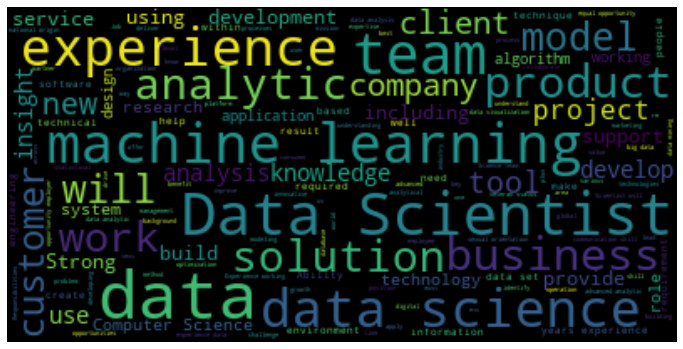

In [19]:
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Remove stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

en_stopwords = stopwords.words('english')
pt_stopwords = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wittmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
en_stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [22]:
type(description_as_text)

str

In [23]:
all_phrases = description_as_text.split('\n')
# Remove blank elements
all_phrases = [phrase for phrase in all_phrases if len(phrase)>0]

In [24]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [25]:
all_words = []

for phrase in all_phrases:
    all_words.extend(phrase.split())

In [26]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
all_words = [w.translate(table) for w in all_words]
print(all_words[:100])

['At', 'Wish', 'our', 'Data', 'Science', '', 'Engineering', 'team', 'is', 'comprised', 'of', 'Data', 'Scientists', 'Data', 'Analysts', '', 'Data', 'Engineers', 'who', 'focus', 'on', 'centralizing', 'corporate', 'data', 'in', 'order', 'to', 'gain', 'insights', 'knowledge', 'and', 'scalability', 'that', 'empower', 'a', 'proactive', 'and', 'rigorous', 'analysis', 'of', 'key', 'business', 'indicators', 'Our', 'mission', 'is', 'to', 'derive', 'wisdom', 'from', 'data', 'via', 'the', 'application', 'of', 'Data', 'Science', 'Wish', 'has', 'exciting', 'opportunities', 'for', 'talented', 'Data', 'Scientists', 'to', 'form', 'the', 'foundation', 'of', 'our', 'centralized', 'data', 'science', 'team', 'Successful', 'candidates', 'will', 'have', 'extensive', 'backgrounds', 'in', 'a', 'quantitative', 'fields', 'and', 's', 'track', 'record', 'of', 'using', 'data', 'to', 'drive', 'the', 'understanding', 'growth', 'and', 'the', 'success']


In [27]:
# Lower all words
all_words = [w.lower() for w in all_words]

In [29]:
print(all_words[:20])

['at', 'wish', 'our', 'data', 'science', '', 'engineering', 'team', 'is', 'comprised', 'of', 'data', 'scientists', 'data', 'analysts', '', 'data', 'engineers', 'who', 'focus']


In [32]:
all_words[0] not in en_stopwords

False

In [33]:
all_words = [w for w in all_words if w not in en_stopwords]

In [34]:
description_as_text_clean = ' '.join(all_words)

In [35]:
# We removed 100k chars 
len(description_as_text_clean)

701717

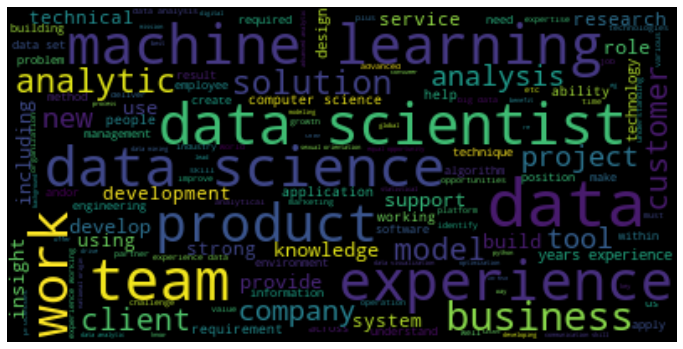

In [36]:
# Generate a word cloud image with the clean text
wordcloud = WordCloud(max_font_size=40).generate(description_as_text_clean)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [37]:
drop_list = ['team', 'company', 'experience', 'business', 'work']

In [38]:
description_as_text_clean = ' '.join([w for w in all_words if w not in drop_list])

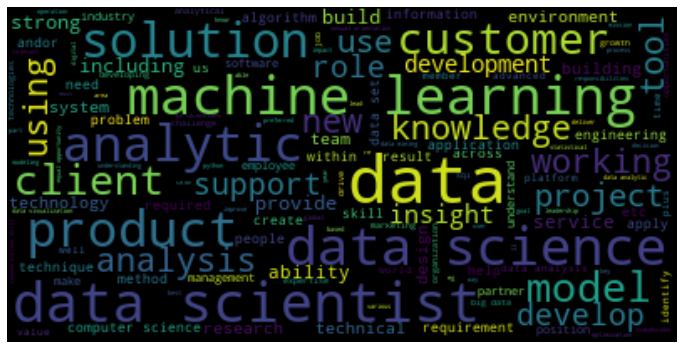

In [39]:
# Generate a word cloud image with the clean text
wordcloud = WordCloud(max_font_size=40).generate(description_as_text_clean)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
# TODO: Usar um word embedding para encontrar um cluster de habilidades
# Vou exportar o texto limpo para fazer isso em outro notebook
description_as_text_clean[:100]

'wish data science  engineering comprised data scientists data analysts  data engineers focus central'

In [41]:
with open("linkedin_all_description_clean_usa.txt", "w") as text_file:
    text_file.write(description_as_text_clean)

Let's count some of the required skills

In [42]:
sum(['python' in w for w in all_words])

293

In [43]:
sum([w=='r' for w in all_words])

209

In [66]:
sum(['sql' in w for w in all_words])

231

In [45]:
sum([w=='etl' for w in all_words])

19

In [46]:
sum([w=='bi' for w in all_words])

29

In [47]:
sum([w1=='machine' and w2=='learning' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

402

In [48]:
sum([w1=='deep' and w2=='learning' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

48

In [49]:
sum([w1=='data' and w2=='science' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

391

In [50]:
sum([w1=='big' and w2=='data' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

86

In [51]:
sum([w=='scala' for w in all_words])

33

In [52]:
sum([w=='pandas' for w in all_words])

24

In [53]:
sum([w1=='power' and w2=='bi' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

8

In [54]:
sum([w=='excel' for w in all_words])

28

In [55]:
sum([w=='javascript' for w in all_words])

5

In [56]:
sum([w=='java' for w in all_words])

49

In [57]:
sum([w1=='business' and w2=='intelligence' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

26

In [58]:
sum([w=='statistics' for w in all_words])

210

In [59]:
sum([w=='optimization' for w in all_words])

71

In [63]:
sum([w=='svm' for w in all_words])

12

In [65]:
sum([w1=='neural' and w2=='networks' 
     for w1, w2 in zip(all_words[:-1], all_words[1:])])

35

In [67]:
sum([w=='aws' for w in all_words])

49

In [70]:
sum([w=='tableau' for w in all_words])

66

In [71]:
sum([w=='qlik' for w in all_words])

6

In [72]:
sum(['spark' in w for w in all_words])

86

In [73]:
sum(['hadoop' in w for w in all_words])

65

In [74]:
sum(['keras' in w for w in all_words])

19

In [75]:
sum(['tensorflow' in w for w in all_words])

43

In [76]:
sum(['pytorch' in w for w in all_words])

8

In [77]:
sum(['excel' in w for w in all_words])

135